# import needed packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# read in data and seperate to train and test

In [2]:
df_train = pd.read_csv('Data/RF_train.csv',index_col=0)
df_test = pd.read_csv('Data/RF_test.csv',index_col=0)

X_train = df_train.drop('digit',axis=1)
y_train = df_train['digit']
X_test = df_test.drop('digit',axis=1)
y_test = df_test['digit']

# build random forest classifier model

## instance classifier

In [3]:
gbc=GradientBoostingClassifier()
xgb=XGBClassifier(max_depth=2, learning_rate=0.05)

## train model

In [4]:
gbc.fit(X_train,y_train)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

## confusion matrix on training set

In [5]:
pd.DataFrame(confusion_matrix(y_train, gbc.predict(X_train),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,780,0,0,0,0,0,0,0,0,0
1,0,779,0,0,0,0,0,0,0,0
2,0,0,780,0,0,0,0,0,0,0
3,0,0,0,719,0,0,0,0,0,0
4,0,0,0,0,780,0,0,0,0,0
5,0,0,0,0,0,720,0,0,0,0
6,0,0,0,0,0,0,720,0,0,0
7,0,0,0,0,0,0,0,778,0,0
8,0,0,0,0,0,0,0,0,719,0
9,0,0,0,0,0,0,0,0,0,719


In [6]:
print('gradient boosting')
pd.DataFrame(confusion_matrix(y_train, xgb.predict(X_train),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

gradient boosting


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,2,3,4,5,6,7,8,9
0,758,1,0,0,1,0,0,0,16,4
1,0,647,109,12,3,2,2,1,0,3
2,0,25,753,0,0,0,0,2,0,0
3,0,5,1,708,0,0,0,4,0,1
4,1,0,0,0,774,0,0,1,0,4
5,0,1,0,29,2,635,0,0,17,36
6,0,0,0,0,6,2,712,0,0,0
7,0,3,0,3,0,1,0,761,8,2
8,13,2,0,0,0,1,2,7,691,3
9,0,8,0,3,3,1,0,0,5,699


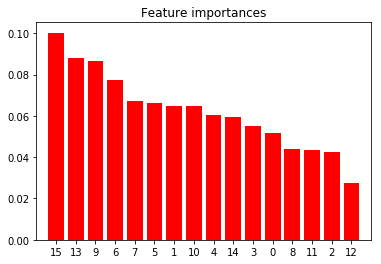

In [7]:
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

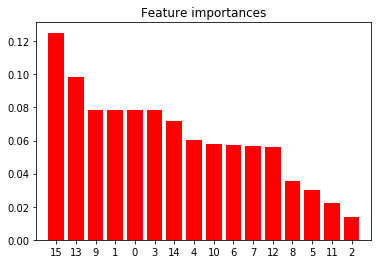

In [8]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Model evaluation on test dataset

## model accuarcy on test dataset

In [9]:
print('gradient boosting score:', gbc.score(X_test,y_test))
print('xgboost score:', xgb.score(X_test,y_test))

gradient boosting score: 0.9608347627215552
xgboost score: 0.8896512292738707


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## confusion matrix for test dataset

In [10]:
pd.DataFrame(confusion_matrix(y_test,gbc.predict(X_test),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

,0,1,2,3,4,5,6,7,8,9
0,342,0,0,0,0,0,0,0,21,0
1,0,338,24,0,1,1,0,0,0,0
2,0,2,361,0,0,0,0,1,0,0
3,0,3,0,331,0,0,0,1,0,1
4,0,1,0,0,363,0,0,0,0,0
5,0,0,0,5,0,309,1,0,4,16
6,0,0,0,0,0,1,334,0,1,0
7,0,22,4,0,0,0,0,326,0,12
8,1,0,0,0,0,0,0,0,335,0
9,0,6,0,6,0,0,0,1,1,322


In [11]:
pd.DataFrame(confusion_matrix(y_test,xgb.predict(X_test),labels=[0,1,2,3,4,5,6,7,8,9]),
            index=range(0,10),
            columns=range(0,10))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,2,3,4,5,6,7,8,9
0,322,1,0,0,0,0,0,0,40,0
1,0,244,103,2,1,8,0,3,0,3
2,0,19,343,0,0,0,0,2,0,0
3,0,7,0,327,0,0,0,1,0,1
4,0,1,0,0,359,2,0,0,0,2
5,0,0,0,21,6,245,0,0,16,47
6,0,0,0,0,0,7,328,0,1,0
7,0,25,4,2,0,0,0,305,3,25
8,5,0,0,0,0,3,0,0,327,1
9,0,10,0,8,3,0,0,2,1,312
